In [0]:
#Import libraries for simulation
import tensorflow as tf
import numpy as np

#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

Simple follwing of Tutorial to compute and display the Mandelbrot set with TensorFlow, tutorial from: https://www.tensorflow.org/tutorials/non-ml/mandelbrot

In [0]:
# Define a function to display the fractal once its produced

def DisplayFractal(a,fmt='jpeg'):
    """Display an array of iteration counts as a picture of a fractal"""
    a_cyclic = (6.28*a/20).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),30+50*np.sin(a_cyclic),155-80*np.cos(a_cyclic)],2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a,0,255))
    f = BytesIO()
    PIL.Image.fromarray(a).sdave(f,fmt)
    display(Image(data=f.getvalue()))
    

In [49]:
#Initiate interactive session

sess = tf.InteractiveSession()

# use numpy to create 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005,-2:1:0.005]
Z = X + 1J*Y

#define and initialize Tensors

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs,tf.float32))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


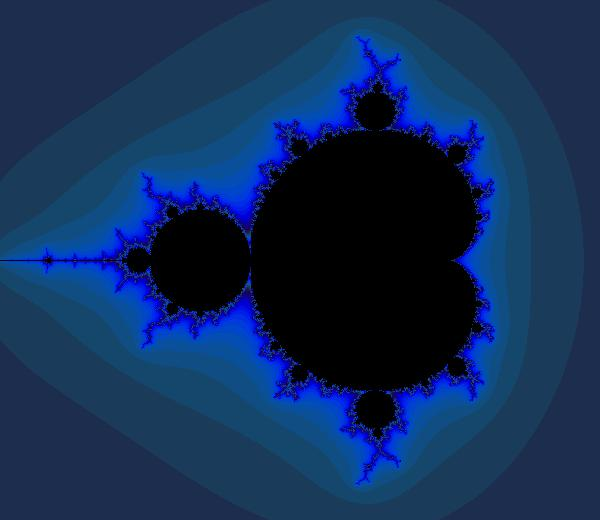

In [52]:
#Initiate global variable and define computation

    

tf.global_variables_initializer().run()

#compute new values of z:z^2 +x

zs_ = zs*zs + xs

#Have we diverged with new value?
not_diverged = tf.abs(zs_) < 4

#operation to update zs and iteration count

step = tf.group(zs.assign(zs_),ns.assign_add(tf.cast(not_diverged,tf.float32)))

#finally run the code for some steps

for i in range(100):step.run()
   

DisplayFractal(ns.eval())